In [1]:
# !pip uninstall prophet
# !pip install prophet

In [15]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv('/Users/kendrickchuah/code/reedyoh/InvestoInsight/sorted_feature_matrix.csv')

df.head()

,Unnamed: 0,Date,Dividend,Volume,stock_price,fed_funds_rate,GDP,Tickers,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,pos_ma,neu_ma,neg_ma
0,69,2018-01-31,0.00,5.315047e+06,51.919825,1.41,4500.182,AAL,-134.253165,0.807713,-0.941772,0.484585,0.476713,1.930838,0.285655,0.519859,0.194486
1,138,2018-01-31,0.00,1.795523e+08,40.275178,1.41,4500.182,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.222114,0.697481,0.080405
2,207,2018-01-31,0.71,7.794467e+06,87.747239,1.41,4500.182,ABBV,-23.651147,1.818001,-0.940431,1.083967,0.657965,1.027436,0.351660,0.399009,0.249330
3,276,2018-01-31,0.28,7.860137e+06,54.655791,1.41,4500.182,ABT,1.333073,0.319962,0.018336,1.128287,0.829424,0.837345,0.323488,0.580027,0.096485
4,345,2018-01-31,0.00,1.614810e+06,29.889667,1.41,4500.182,ACGL,2.331811,0.564373,0.024308,0.679544,0.278000,0.000000,0.000003,0.000015,0.999982


In [4]:
stock_data = df.rename(columns={'Date': 'ds', 'stock_price': 'y'})
stock_data = stock_data.reset_index()
stock_data['ds'] = pd.to_datetime(stock_data['ds'])

In [5]:
# Sort your DataFrame by the datetime column
df = stock_data.sort_values(by='ds')

# Calculate the cut-off point for splitting
cutoff_date = df['ds'].max() - pd.DateOffset(months=12)

# Split the data into training and test sets
train_data = df[df['ds'] <= cutoff_date]
test_data = df[(df['ds'] > cutoff_date) & (df['ds'] <= cutoff_date + pd.DateOffset(months=12))]

In [7]:
train_data.head()

,index,Unnamed: 0,ds,Dividend,Volume,y,fed_funds_rate,GDP,Tickers,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,pos_ma,neu_ma,neg_ma
0,0,69,2018-01-31,0.000000,5.315047e+06,51.919825,1.41,4500.182,AAL,-134.253165,0.807713,-0.941772,0.484585,0.476713,1.930838,0.285655,0.519859,0.194486
304,304,23758,2018-01-31,0.770000,3.153467e+06,39.549498,1.41,4500.182,OKE,1.692314,0.761522,0.047087,0.563877,0.135708,0.540405,0.000004,0.999971,0.000025
303,303,23652,2018-01-31,0.000000,9.646500e+05,92.365229,1.41,4500.182,ODFL,0.333360,2.118108,0.066277,3.251481,0.166119,-0.100032,0.217593,0.670863,0.111544
302,302,23583,2018-01-31,0.212209,2.919831e+06,38.530611,1.41,4500.182,O,0.961939,0.335424,0.012897,0.028913,0.135766,-0.750594,0.001090,0.998810,0.000100
301,301,23445,2018-01-31,0.000000,2.373877e+06,15.401748,1.41,4500.182,NWSA,0.758773,0.172975,0.010906,1.151199,1.389065,3.453608,0.053748,0.925971,0.020281


Test on 1 stock

In [11]:
ticker_data = train_data.loc[train_data['Tickers'] == "AAPL"]

# Initialize and fit the Prophet model for the current ticker
model = Prophet()
model.fit(ticker_data)

# Create a future DataFrame for predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Adjust as needed

# Make predictions for the current ticker
forecast = model.predict(future)
forecast  # Add a 'ticker' column to identify the forecasts

20:12:33 - cmdstanpy - INFO - Chain [1] start processing


20:12:34 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-31,29.269890,26.027748,52.286259,29.269890,29.269890,9.987428,9.987428,9.987428,9.987428,9.987428,9.987428,0.0,0.0,0.0,39.257318
1,2018-02-28,30.658167,23.750671,48.846028,30.658167,30.658167,6.057066,6.057066,6.057066,6.057066,6.057066,6.057066,0.0,0.0,0.0,36.715233
2,2018-03-31,32.195188,19.959920,45.672717,32.195188,32.195188,1.083507,1.083507,1.083507,1.083507,1.083507,1.083507,0.0,0.0,0.0,33.278695
3,2018-04-30,33.682628,21.984181,47.161146,33.682628,33.682628,1.108183,1.108183,1.108183,1.108183,1.108183,1.108183,0.0,0.0,0.0,34.790810
4,2018-05-31,35.219649,19.377954,44.188559,35.219649,35.219649,-3.389366,-3.389366,-3.389366,-3.389366,-3.389366,-3.389366,0.0,0.0,0.0,31.830283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2023-05-31,198.963205,182.832470,208.953636,198.024979,199.878726,-3.139843,-3.139843,-3.139843,-3.139843,-3.139843,-3.139843,0.0,0.0,0.0,195.823362
65,2023-06-30,202.053085,180.807942,206.828976,200.923008,203.082495,-8.191873,-8.191873,-8.191873,-8.191873,-8.191873,-8.191873,0.0,0.0,0.0,193.861212
66,2023-07-31,205.245961,188.518592,212.718191,203.906625,206.443393,-4.656296,-4.656296,-4.656296,-4.656296,-4.656296,-4.656296,0.0,0.0,0.0,200.589665
67,2023-08-31,208.438837,197.597380,223.090542,206.932653,209.822660,1.555031,1.555031,1.555031,1.555031,1.555031,1.555031,0.0,0.0,0.0,209.993868


In [20]:
ticker_data.shape

(57, 18)

/Users/kendrickchuah/.pyenv/versions/3.10.6/envs/InvestoInsight/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/kendrickchuah/.pyenv/versions/3.10.6/envs/InvestoInsight/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


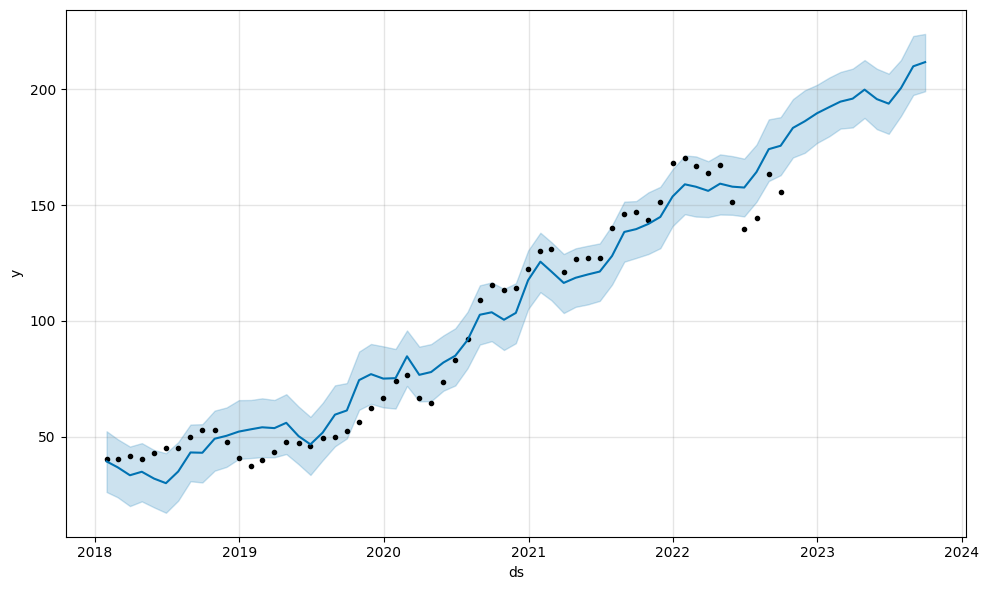

In [13]:
# for symbol in all_forecasts['symbol']:
#     fig = model.plot(all_forecasts['symbol'] == symbol)

fig = model.plot(forecast)

In [24]:
aapl = df[df['Tickers']== "AAPL"]
aapl

,index,Unnamed: 0,ds,Dividend,Volume,y,fed_funds_rate,GDP,Tickers,debt_to_equity,EPS,return_on_equity,quick ratio,operating_ratio,inventory_turnover,pos_ma,neu_ma,neg_ma
1,1,138,2018-01-31,0.0000,1.795523e+08,40.275178,1.41,4500.182000,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.222114,0.697481,8.040471e-02
448,448,139,2018-02-28,0.1575,1.795523e+08,40.275178,1.42,4549.064667,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.237099,0.657282,1.056192e-01
906,906,140,2018-03-31,0.0000,1.408173e+08,41.485005,1.51,4597.947333,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.217146,0.637216,1.456380e-01
1372,1372,141,2018-04-30,0.0000,1.329808e+08,40.385733,1.69,4646.830000,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.188215,0.633217,1.785686e-01
1838,1838,142,2018-05-31,0.1825,1.234549e+08,42.894046,1.70,4661.188333,AAPL,2.413301,2.970566,0.131828,1.098802,0.743752,9.811931,0.257901,0.637290,1.048093e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30520,30520,202,2023-05-31,0.2400,5.633145e+07,170.569296,5.06,5105.025000,AAPL,4.485512,1.359489,0.349863,0.908233,0.720599,6.474396,0.000005,0.997847,2.148082e-03
31002,31002,203,2023-06-30,0.0000,5.990656e+07,180.404719,5.08,5105.025000,AAPL,4.558582,1.270525,0.329844,0.922737,0.727719,6.173854,0.249997,0.749991,1.255915e-05
31484,31484,204,2023-07-31,0.0000,5.990656e+07,180.404719,5.08,5105.025000,AAPL,4.558582,1.270525,0.329844,0.922737,0.727719,6.173854,0.500628,0.498846,5.262758e-04
31965,31965,205,2023-08-31,0.0000,5.990656e+07,180.404719,5.08,5105.025000,AAPL,4.558582,1.270525,0.329844,0.922737,0.727719,6.173854,0.502358,0.497387,2.558414e-04


In [25]:
rmse = sqrt(mean_squared_error(aapl['y'], forecast['yhat']))
rmse

18.321353371287547

Actual application to all tickers in S&P500

All unique tickers in dataset

In [29]:
tickers = df['Tickers'].unique()
tickers[0:10]

array(['AAL', 'OKE', 'ODFL', 'O', 'NWSA', 'NWS', 'NWL', 'NVR', 'NVDA',
       'NUE'], dtype=object)

In [30]:
# Create a dictionary to store results
results = {'Ticker': [], 'RMSE': []}

In [34]:
# Create an empty DataFrame to store all forecasts
combined_forecasts = pd.DataFrame()

In [35]:
# Loop through each unique 'ticker'
for ticker in tickers:
    # Filter data for the current ticker
    stock_data = train_data[train_data['Tickers'] == ticker]
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(stock_data)
    
    # Make predictions for the next 12 months
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    
    # #Filter original data for specific ticker (use for RMSE calculation)
    # ticker_df = df.loc[df['Tickers'] == ticker]

    # Add a column 'ticker' to the forecast DataFrame to indicate the stock ticker
    forecast['ticker'] = ticker
    
    # Concatenate the current forecast with the combined_forecasts DataFrame
    combined_forecasts = pd.concat([combined_forecasts, forecast])
    

21:52:49 - cmdstanpy - INFO - Chain [1] start processing


21:52:50 - cmdstanpy - INFO - Chain [1] done processing
21:52:50 - cmdstanpy - INFO - Chain [1] start processing
21:52:50 - cmdstanpy - INFO - Chain [1] done processing
21:52:50 - cmdstanpy - INFO - Chain [1] start processing
21:52:50 - cmdstanpy - INFO - Chain [1] done processing
21:52:50 - cmdstanpy - INFO - Chain [1] start processing
21:52:50 - cmdstanpy - INFO - Chain [1] done processing
21:52:51 - cmdstanpy - INFO - Chain [1] start processing
21:52:51 - cmdstanpy - INFO - Chain [1] done processing
21:52:51 - cmdstanpy - INFO - Chain [1] start processing
21:52:51 - cmdstanpy - INFO - Chain [1] done processing
21:52:51 - cmdstanpy - INFO - Chain [1] start processing
21:52:51 - cmdstanpy - INFO - Chain [1] done processing
21:52:52 - cmdstanpy - INFO - Chain [1] start processing
21:52:52 - cmdstanpy - INFO - Chain [1] done processing
21:52:52 - cmdstanpy - INFO - Chain [1] start processing
21:52:52 - cmdstanpy - INFO - Chain [1] done processing
21:52:52 - cmdstanpy - INFO - Chain [1] 

In [37]:
combined_forecasts.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ticker
0,2018-01-31,47.042737,44.661879,53.080088,47.042737,47.042737,1.664252,1.664252,1.664252,1.664252,1.664252,1.664252,0.0,0.0,0.0,48.706988,AAL
1,2018-02-28,46.117319,43.544297,52.133810,46.117319,46.117319,1.497352,1.497352,1.497352,1.497352,1.497352,1.497352,0.0,0.0,0.0,47.614670,AAL
2,2018-03-31,45.092749,42.024793,50.587579,45.092749,45.092749,1.006878,1.006878,1.006878,1.006878,1.006878,1.006878,0.0,0.0,0.0,46.099626,AAL
3,2018-04-30,44.101229,40.389035,48.552694,44.101229,44.101229,0.553301,0.553301,0.553301,0.553301,0.553301,0.553301,0.0,0.0,0.0,44.654531,AAL
4,2018-05-31,43.076660,38.581937,47.432474,43.076660,43.076660,0.114110,0.114110,0.114110,0.114110,0.114110,0.114110,0.0,0.0,0.0,43.190770,AAL


In [39]:
mmm = combined_forecasts[combined_forecasts['ticker']== "MMM"]
mmm

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ticker
0,2018-01-31,163.684136,156.624456,199.820179,163.684136,163.684136,14.350739,14.350739,14.350739,14.350739,14.350739,14.350739,0.0,0.0,0.0,178.034875,MMM
1,2018-02-28,163.259342,153.439709,194.841561,163.259342,163.259342,10.538612,10.538612,10.538612,10.538612,10.538612,10.538612,0.0,0.0,0.0,173.797954,MMM
2,2018-03-31,162.789034,150.376201,192.042473,162.789034,162.789034,7.791861,7.791861,7.791861,7.791861,7.791861,7.791861,0.0,0.0,0.0,170.580895,MMM
3,2018-04-30,162.333897,148.306562,189.723785,162.333897,162.333897,7.800833,7.800833,7.800833,7.800833,7.800833,7.800833,0.0,0.0,0.0,170.134730,MMM
4,2018-05-31,161.863589,142.303151,183.335771,161.863589,161.863589,0.497526,0.497526,0.497526,0.497526,0.497526,0.497526,0.0,0.0,0.0,162.361115,MMM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2023-05-31,134.934271,111.544279,151.863435,134.924235,134.945578,-2.626830,-2.626830,-2.626830,-2.626830,-2.626830,-2.626830,0.0,0.0,0.0,132.307441,MMM
65,2023-06-30,134.497523,109.158770,148.799333,134.485202,134.510748,-7.483141,-7.483141,-7.483141,-7.483141,-7.483141,-7.483141,0.0,0.0,0.0,127.014382,MMM
66,2023-07-31,134.046217,111.285563,153.298923,134.031049,134.062015,-1.014206,-1.014206,-1.014206,-1.014206,-1.014206,-1.014206,0.0,0.0,0.0,133.032011,MMM
67,2023-08-31,133.594910,117.956568,158.959626,133.577306,133.613384,4.356126,4.356126,4.356126,4.356126,4.356126,4.356126,0.0,0.0,0.0,137.951036,MMM
